In [1]:
#!pip install --upgrade pip #此命令可以忽略，除非运行下面命令时候提示你需要升级pip
#!pip install scikit-learn
#!pip install tensorflow==2.0.0-beta1
#!pip install matplotlib
#!pip install pandas
#!pip install numpy
#!pip install pydot
#!pip install graphviz
#!pip install tqdm
#!pip install scikit-image
#!pip install opencv-python

In [2]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
import tensorflow.keras as keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd
import random

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

/anaconda3/envs/tf2-new/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/tf2-new/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/tf2-new/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/tf2-new/lib/python3.7/site-packages/tensorflow/python/framework

In [3]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

In [4]:
# 1. 增加类别，见下面注释（label从0开始，每次加1）
# 2. 图片缩放，本例中图片缩小到了200*200像素
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['cardboard']: #定义多个类别
                label = 0
            elif nextDir in ['glass']:
                label = 1
            elif nextDir in ['metal']:
                label = 2
            elif nextDir in ['paper']:
                label = 3
            elif nextDir in ['plastic']:
                label = 4
            elif nextDir in ['trash']:
                label = 5
            #elif nextDir in ['OTHER']:
            #    label = 2
            else:
                label = 100
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (200, 200, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [5]:
# 1. 定义你的数据目录
TRAIN_DIR = "trash/train/"
TEST_DIR =  "trash/test/"

In [6]:
X_train_full, y_train_full = get_data(TRAIN_DIR)
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 81/81 [00:02<00:00, 33.93it/s]


In [7]:
# 1. 对照上面get_data中的类别（顺序要一致）
class_names = ["carboard", "glass", "metal", "paper", "plastic", "trash"]

In [8]:
# 1. 对训练数据的顺序进行打乱
tmp = list(zip(X_train_full, y_train_full))
random.shuffle(tmp)
X_train_full, y_train_full = zip(*tmp)
X_train_full = np.asarray(list(X_train_full))
y_train_full = np.asarray(list(y_train_full))

In [9]:
# 1. 对测试数据的顺序进行打乱
tmp = list(zip(X_test, y_test))
random.shuffle(tmp)
X_test, y_test = zip(*tmp)
X_test = np.asarray(list(X_test))
y_test = np.asarray(list(y_test))

In [10]:
X_train_full.shape

(2097, 200, 200, 3)

In [11]:
X_train_full[0]

array([[[0.89019608, 0.82352941, 0.79035294],
        [0.88886275, 0.82219608, 0.78690196],
        [0.8827451 , 0.81607843, 0.78078431],
        ...,
        [0.69019608, 0.62705882, 0.61176471],
        [0.68627451, 0.62022118, 0.60784314],
        [0.68023529, 0.61356863, 0.60180392]],

       [[0.89019608, 0.82352941, 0.78823529],
        [0.88627451, 0.81960784, 0.78431373],
        [0.8827451 , 0.81607843, 0.78078431],
        ...,
        [0.69372549, 0.62720784, 0.61529412],
        [0.68760784, 0.62192471, 0.61016   ],
        [0.68384314, 0.61717647, 0.60541176]],

       [[0.88627451, 0.81960784, 0.78431373],
        [0.88494118, 0.81827451, 0.78391373],
        [0.88129412, 0.81462745, 0.77933333],
        ...,
        [0.69384314, 0.62745098, 0.61541176],
        [0.69059608, 0.62470588, 0.61216471],
        [0.69019608, 0.62352941, 0.61176471]],

       ...,

       [[0.69411765, 0.65882353, 0.64705882],
        [0.69411765, 0.65882353, 0.64705882],
        [0.69019608, 0

In [12]:
y_train_full[0]

3

In [13]:
class_names[y_train_full[0]]

'paper'

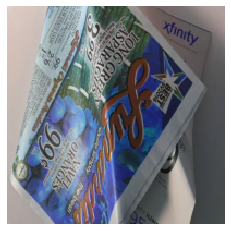

In [14]:
plt.imshow(X_train_full[0])
plt.axis('off')
plt.show()

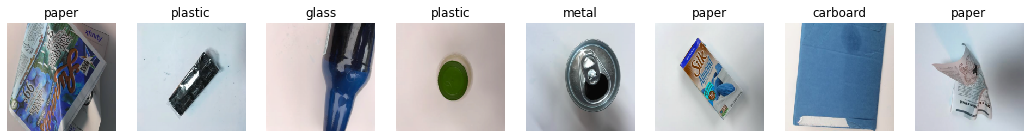

In [15]:
plt.figure(figsize=(18.2, 2.4))
for index, image in enumerate(X_train_full[:8]):
    plt.subplot(1, 8, index + 1)
    plt.imshow(image.reshape(200, 200, 3), interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [16]:
X_train_full = X_train_full.astype('float32')  
X_test = X_test.astype('float32')

In [17]:
X_train_full.shape

(2097, 200, 200, 3)

In [18]:
X_train_full.dtype

dtype('float32')

In [19]:
X_train_full[0]

array([[[0.8901961 , 0.8235294 , 0.79035294],
        [0.8888627 , 0.82219607, 0.78690195],
        [0.8827451 , 0.8160784 , 0.7807843 ],
        ...,
        [0.6901961 , 0.6270588 , 0.6117647 ],
        [0.6862745 , 0.6202212 , 0.60784316],
        [0.68023527, 0.6135686 , 0.6018039 ]],

       [[0.8901961 , 0.8235294 , 0.7882353 ],
        [0.8862745 , 0.81960785, 0.78431374],
        [0.8827451 , 0.8160784 , 0.7807843 ],
        ...,
        [0.69372547, 0.6272078 , 0.6152941 ],
        [0.6876078 , 0.6219247 , 0.61016   ],
        [0.68384314, 0.6171765 , 0.60541177]],

       [[0.8862745 , 0.81960785, 0.78431374],
        [0.88494116, 0.8182745 , 0.78391373],
        [0.88129413, 0.81462747, 0.77933335],
        ...,
        [0.6938431 , 0.627451  , 0.61541176],
        [0.6905961 , 0.6247059 , 0.6121647 ],
        [0.6901961 , 0.62352943, 0.6117647 ]],

       ...,

       [[0.69411767, 0.65882355, 0.64705884],
        [0.69411767, 0.65882355, 0.64705884],
        [0.6901961 , 0

In [20]:
# 1. 调整验证数据集valid数量，数据集有2000多个测试图片，拿其中的一部分约400张图片作为验证数据
X_valid, X_train = X_train_full[:400], X_train_full[400:]
y_valid, y_train = y_train_full[:400], y_train_full[400:]
X_test = X_test

In [21]:
X_train.shape

(1697, 200, 200, 3)

In [22]:
X_valid.shape

(400, 200, 200, 3)

In [37]:
# 1. 我们读入的图片像素是200*200 （注意第一个卷积层Conv2D的input_shape)
# 2. 我们的输出只有2个类别 （注意最后一个全连接层Dense的第一个参数）
# 3. 自行调整卷积层Conv2D数，以及每一层的filter数量
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation='relu',input_shape=(200, 200, 3))) #图片的像素和通道
model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))     

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))  

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(96, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.Conv2D(96, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
   
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25)) #需要测试来确定是否需要该层
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(6, activation='softmax')) #2个类别

In [39]:
model.layers

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        1

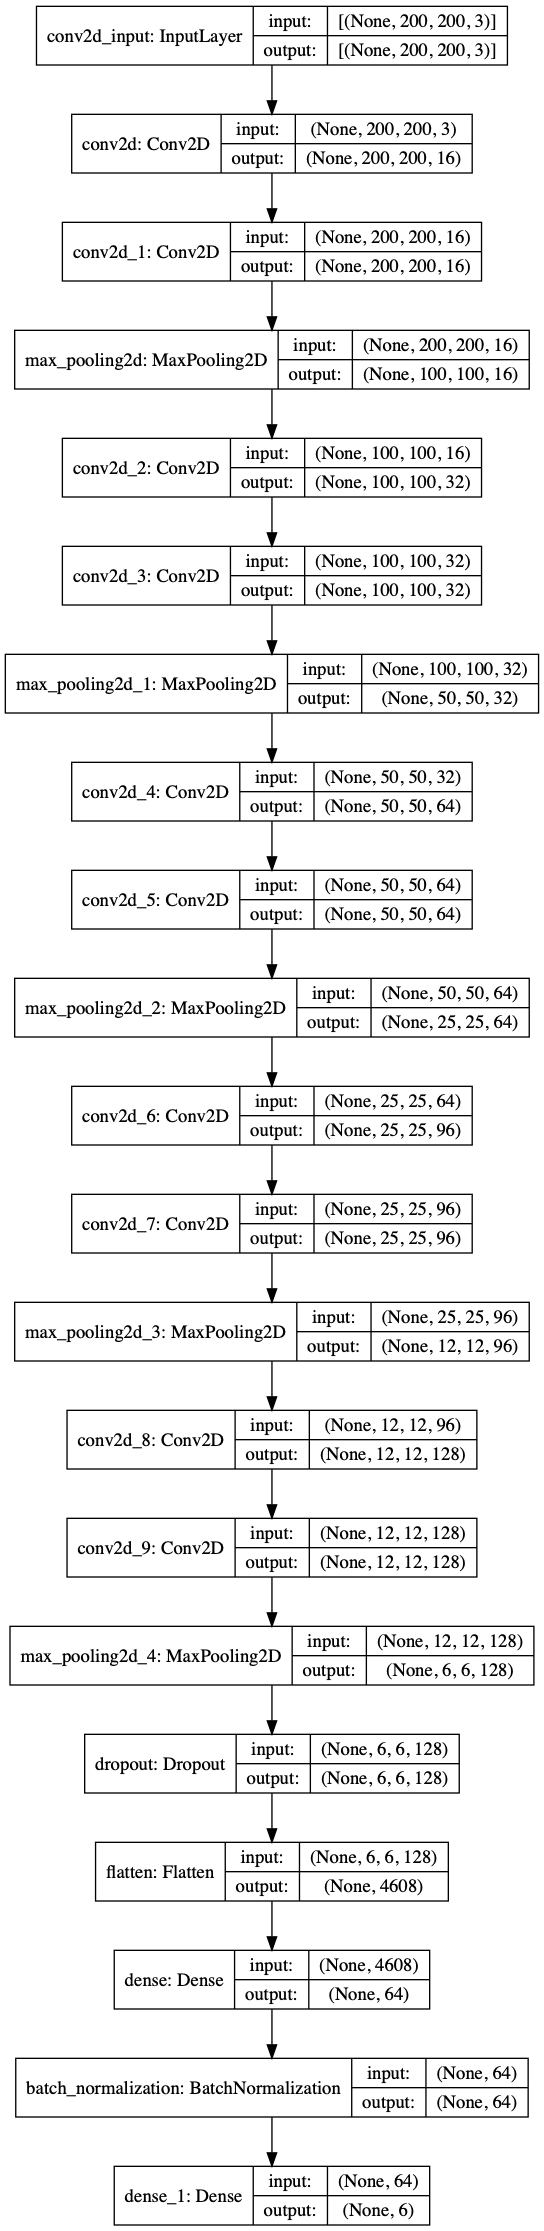

In [41]:
#不是必要的
#https://blog.csdn.net/qq_42685012/article/details/82850952
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [45]:
hidden1 = model.layers[1]
hidden1.name

'conv2d_1'

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=0.0001),
              metrics=["accuracy"])

In [48]:
# 增加epochs来增加训练次数，例如50
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Train on 1697 samples, validate on 400 samples
Epoch 1/5
1697/1697 [==============================] - 84s 50ms/sample - loss: 0.5569 - accuracy: 0.8032 - val_loss: 1.1023 - val_accuracy: 0.6500
Epoch 2/5
1697/1697 [==============================] - 83s 49ms/sample - loss: 0.4986 - accuracy: 0.8303 - val_loss: 1.0749 - val_accuracy: 0.6875
Epoch 3/5
1697/1697 [==============================] - 84s 50ms/sample - loss: 0.4562 - accuracy: 0.8456 - val_loss: 1.2248 - val_accuracy: 0.6125
Epoch 4/5
1697/1697 [==============================] - 84s 49ms/sample - loss: 0.4484 - accuracy: 0.8444 - val_loss: 1.2165 - val_accuracy: 0.6325
Epoch 5/5
1697/1697 [==============================] - 85s 50ms/sample - loss: 0.4020 - accuracy: 0.8686 - val_loss: 1.1026 - val_accuracy: 0.6700


In [49]:
history.params

{'batch_size': 32,
 'epochs': 5,
 'steps': None,
 'samples': 1697,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

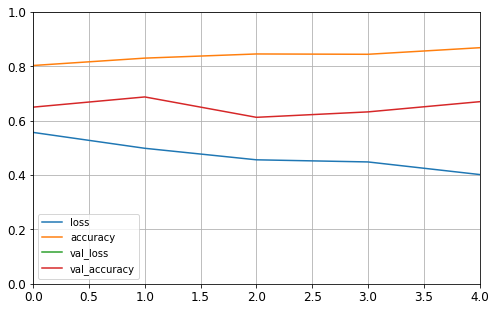

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
model.evaluate(X_test, y_test)

430/430 [==============================] - 6s 14ms/sample - loss: 0.9456 - accuracy: 0.7047


[0.9455910280693409, 0.7046512]

In [58]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.457, 0.288, 0.012, 0.002, 0.009, 0.232],
       [0.02 , 0.029, 0.443, 0.01 , 0.058, 0.441],
       [0.025, 0.357, 0.014, 0.147, 0.352, 0.105],
       [0.   , 0.969, 0.031, 0.   , 0.   , 0.   ],
       [0.051, 0.165, 0.205, 0.01 , 0.049, 0.52 ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.001],
       [0.024, 0.13 , 0.581, 0.001, 0.077, 0.186],
       [0.005, 0.961, 0.001, 0.018, 0.008, 0.007],
       [0.01 , 0.042, 0.936, 0.   , 0.001, 0.01 ]], dtype=float32)

In [59]:
y_pred = model.predict_classes(X_new)
y_pred

array([0, 2, 1, 1, 5, 0, 0, 2, 1, 2])

In [60]:
# 预测结果
np.array(class_names)[y_pred]

array(['carboard', 'metal', 'glass', 'glass', 'trash', 'carboard',
       'carboard', 'metal', 'glass', 'metal'], dtype='<U8')

In [61]:
# 真实结果
y_new = y_test[:10]
np.array(class_names)[y_new]

array(['glass', 'trash', 'plastic', 'glass', 'trash', 'carboard',
       'carboard', 'metal', 'plastic', 'metal'], dtype='<U8')